<a href="https://colab.research.google.com/github/cagBRT/Data/blob/main/Compare_Under_Sampling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare under-sampling samplers for Imbalanced Datasets

In this notebook we compare a selection of undersamplers for imbalanced datasets.

In [16]:
import seaborn as sns
sns.set_context("poster")
import numpy as np
from sklearn.linear_model import LogisticRegression

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import ClusterCentroids

# Create a small dataset

The following function will be used to create toy dataset.<br>

It uses the make_classification from scikit-learn but fixing some parameters.

In [13]:
from sklearn.datasets import make_classification

def create_dataset(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )

The following function plots the sample space after resampling to illustrate the specifics of an algorithm.

In [14]:
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

The following function will be used to plot the decision function of a classifier given some data.



In [15]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

In [17]:
clf = LogisticRegression()

# Under-sampling by generating new samples

ClusterCentroids method under-samples by replacing the original samples by the centroids of the cluster found.<br>

A fully customized sampler, FunctionSampler, is available in imbalanced-learn so that you can fast prototype your own sampler by defining a single function.

Additional parameters can be added using the attribute kw_args which accepts a dictionary. The following example illustrates how to retain the 10 first elements of the array X and y:



---



---



Example of defining a function

In [22]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
def func(X, y):
  return X[:10], y[:10]

sampler = FunctionSampler(func=func)
X_res, y_res = sampler.fit_resample(X, y)
np.all(X_res == X[:10])
np.all(y_res == y[:10])

True

In [28]:
print("Original Dataset: ", X.shape, y.shape)
print("Resample Dataset:", X_res.shape, y_res.shape)

Original Dataset:  (5000, 2) (5000,)
Resample Dataset: (10, 2) (10,)




---



---



# Create a dataset and sample it using Cluster Centroids

In [20]:
X, y = create_dataset(n_samples=400, weights=(0.05, 0.15, 0.8), class_sep=0.8)

samplers = {
    FunctionSampler(),  # identity resampler
    ClusterCentroids(
        estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=0
    ),
}



---



---



The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.



In [30]:
languages = ['Java', 'Python', 'JavaScript']
versions = [14, 3, 6]

result = zip(languages, versions)
print(list(result))

[('Java', 14), ('Python', 3), ('JavaScript', 6)]




---



---



In [32]:
X, y = create_dataset(n_samples=400, weights=(0.05, 0.15, 0.8), class_sep=0.8)

samplers = {
    FunctionSampler(),  # identity resampler
    ClusterCentroids(
        estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=0
    ),
}

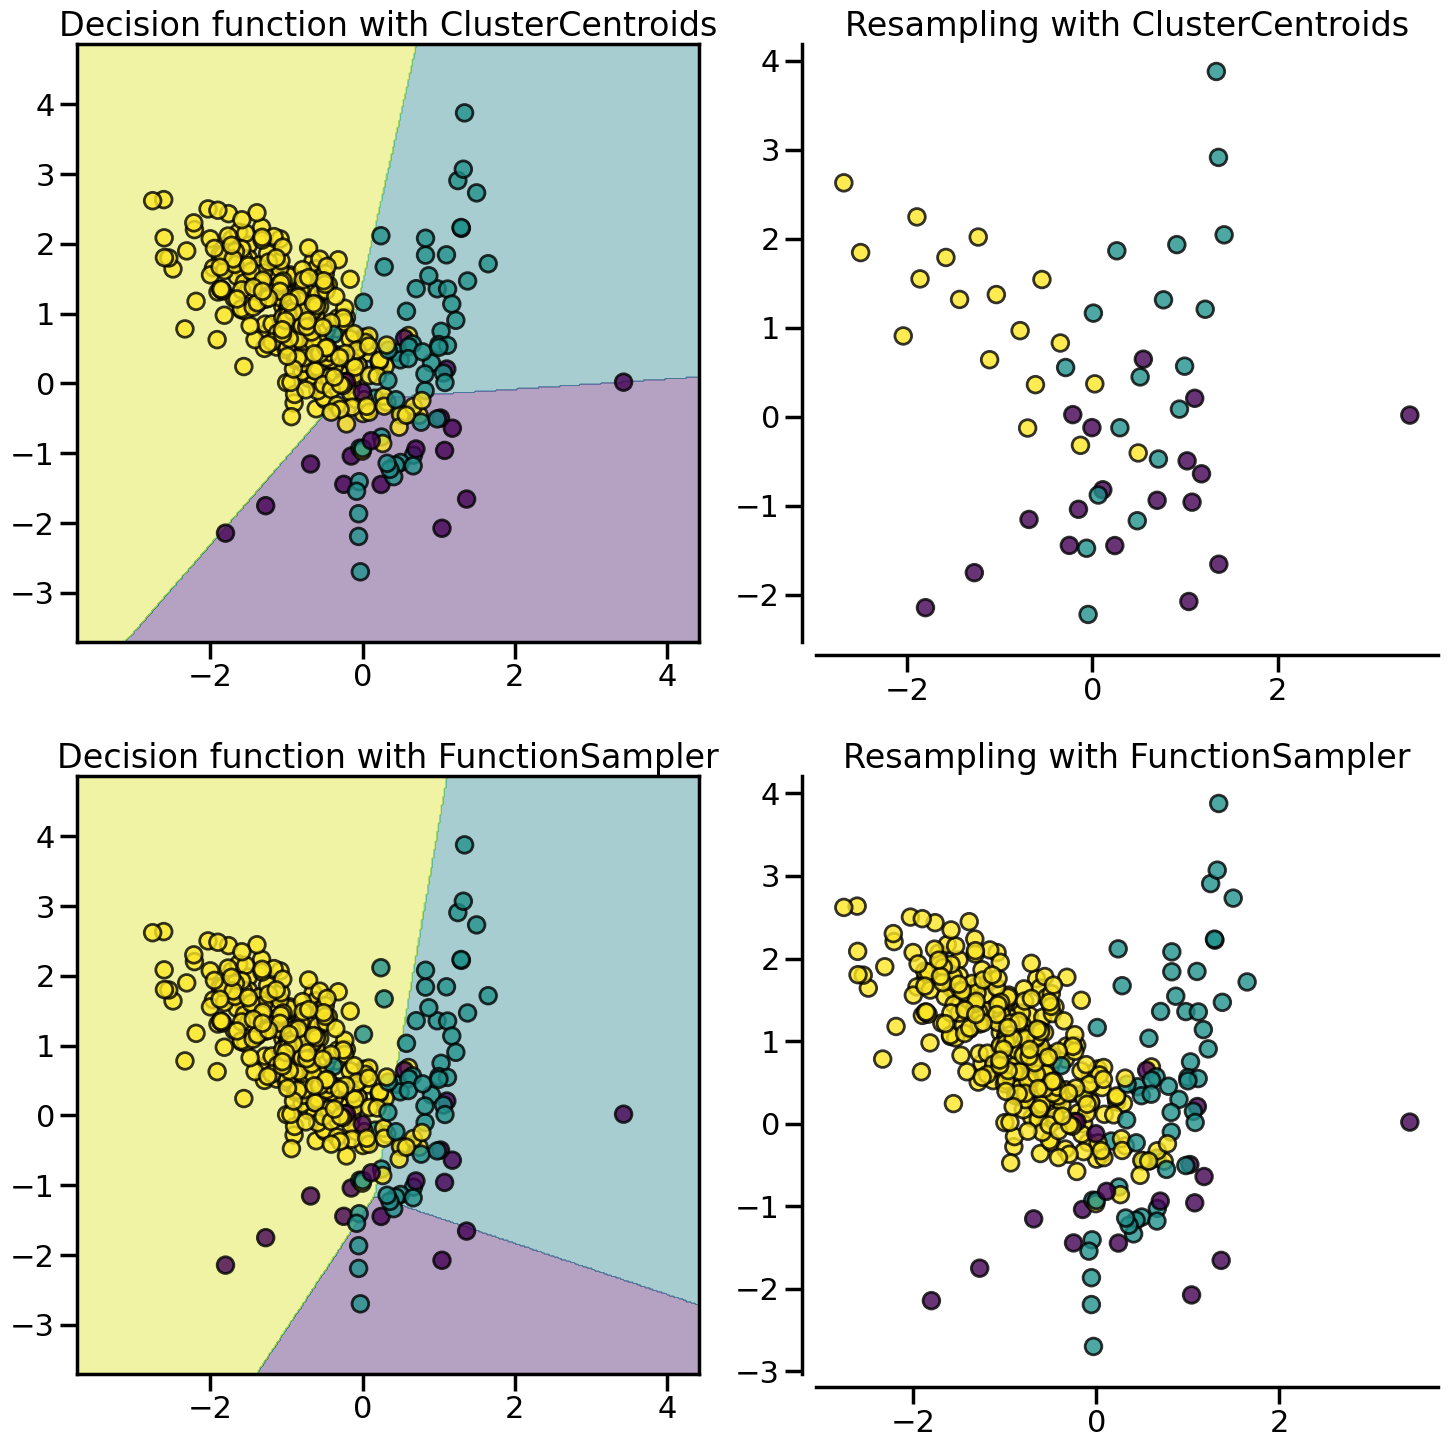

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, model, ax[0], title=f"Decision function with {sampler.__class__.__name__}"
    )
    plot_resampling(X, y, sampler, ax[1])

fig.tight_layout()

# Under-sampling by selecting existing samples

The algorithm performing prototype selection can be subdivided into two groups:

(i) the controlled under-sampling methods<br>
(ii) the cleaning under-sampling methods.

With the controlled under-sampling methods, the number of samples to be selected can be specified. <br>





# RandomUnderSampler
RandomUnderSampler is the most naive way of performing such selection by randomly selecting a given number of samples by the targetted class.

In [35]:
from imblearn.under_sampling import RandomUnderSampler

X, y = create_dataset(n_samples=400, weights=(0.05, 0.15, 0.8), class_sep=0.8)

samplers = {
    FunctionSampler(),  # identity resampler
    RandomUnderSampler(random_state=0),
}



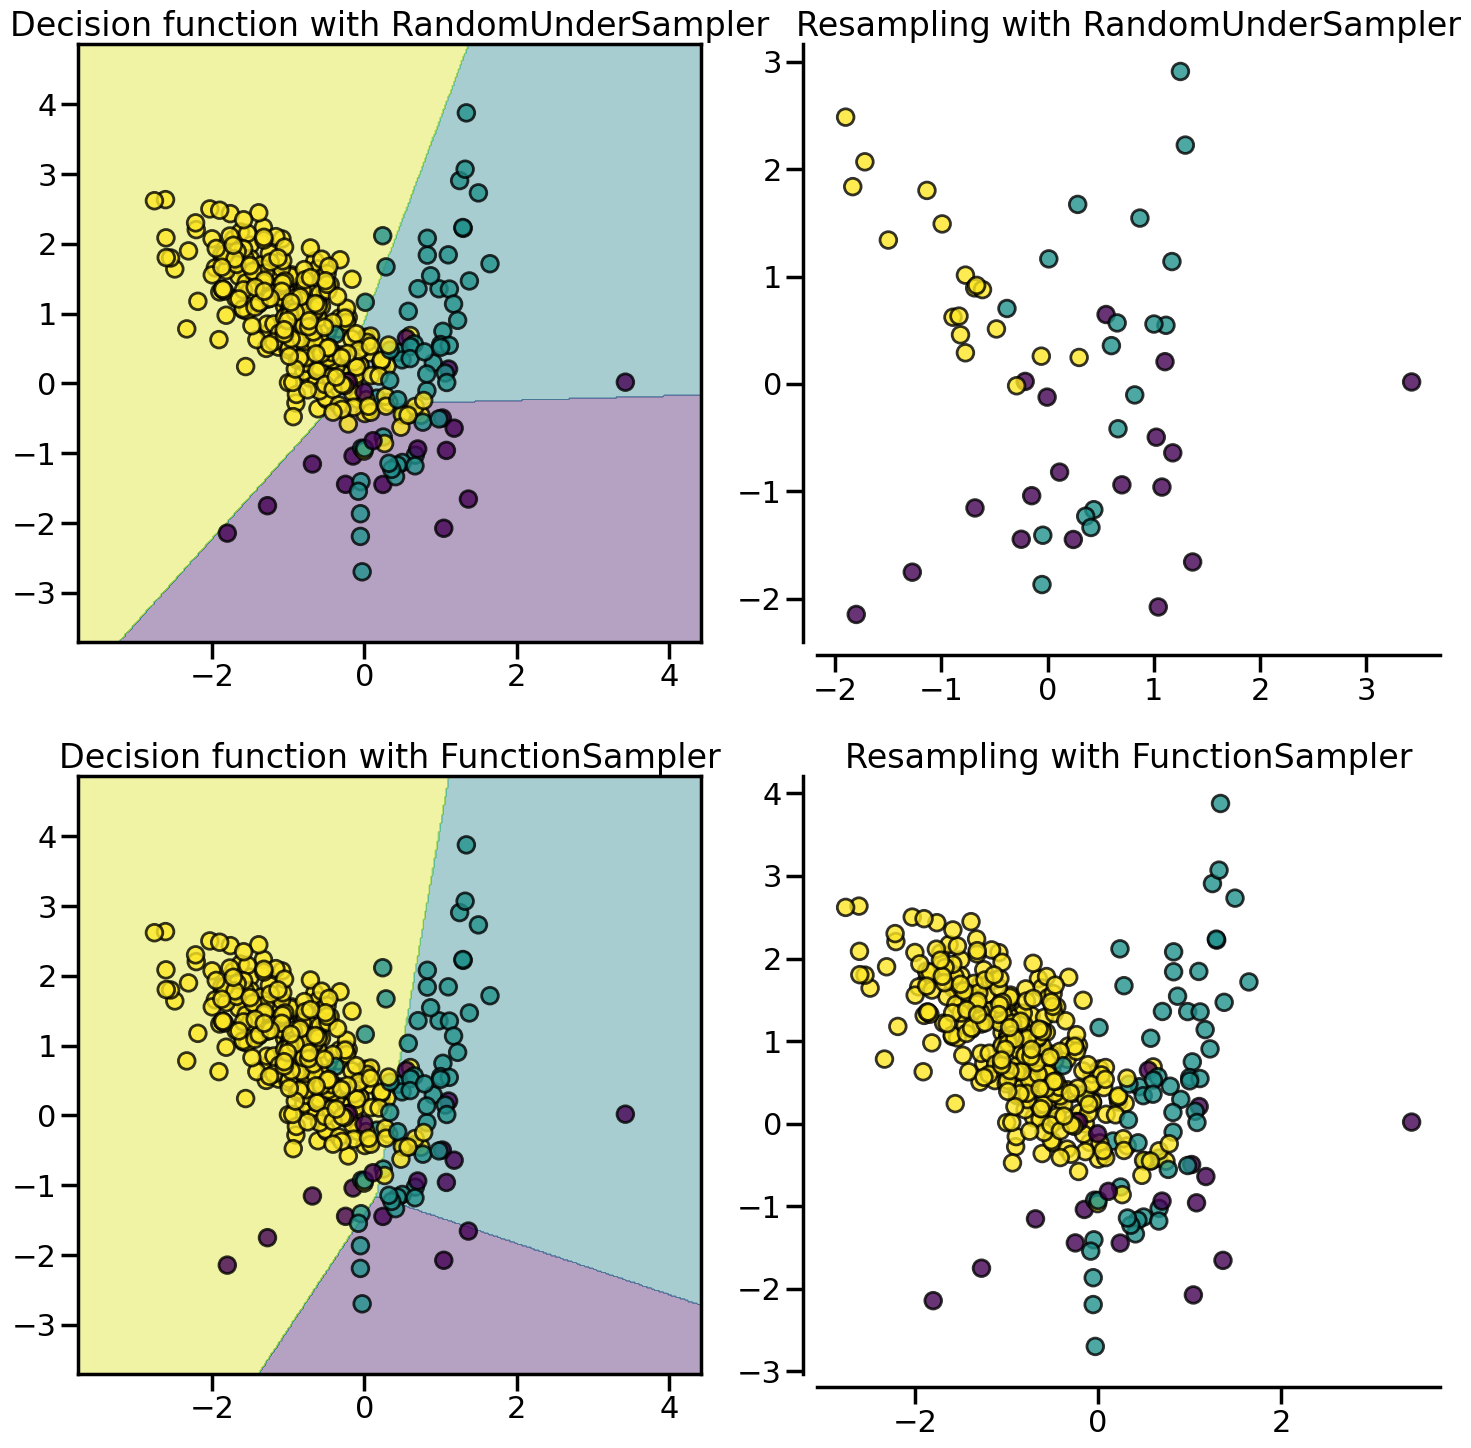

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, model, ax[0], title=f"Decision function with {sampler.__class__.__name__}"
    )
    plot_resampling(X, y, sampler, ax[1])

fig.tight_layout()

# NearMiss

**NearMiss** algorithms implement some heuristic rules in order to select samples.<br>
**NearMiss-1** selects samples from the majority class for which the average distance of the nearest samples of the minority class is the smallest.<br>

**NearMiss-2** selects the samples from the majority class for which the average distance to the farthest samples of the negative class is the smallest. <br>

**NearMiss-3** is a 2-step algorithm:
- first, for each minority sample, their nearest-neighbors will be kept;

- the majority samples selected are the on for which the average distance to the
 nearest neighbors is the largest.

In [58]:
from imblearn.under_sampling import NearMiss

X, y = create_dataset(n_samples=1000, weights=(0.05, 0.15, 0.8), class_sep=1.5)

samplers = [NearMiss(version=1), NearMiss(version=2), NearMiss(version=3)]

Warnings in the output come from NearMiss Version=3

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The n

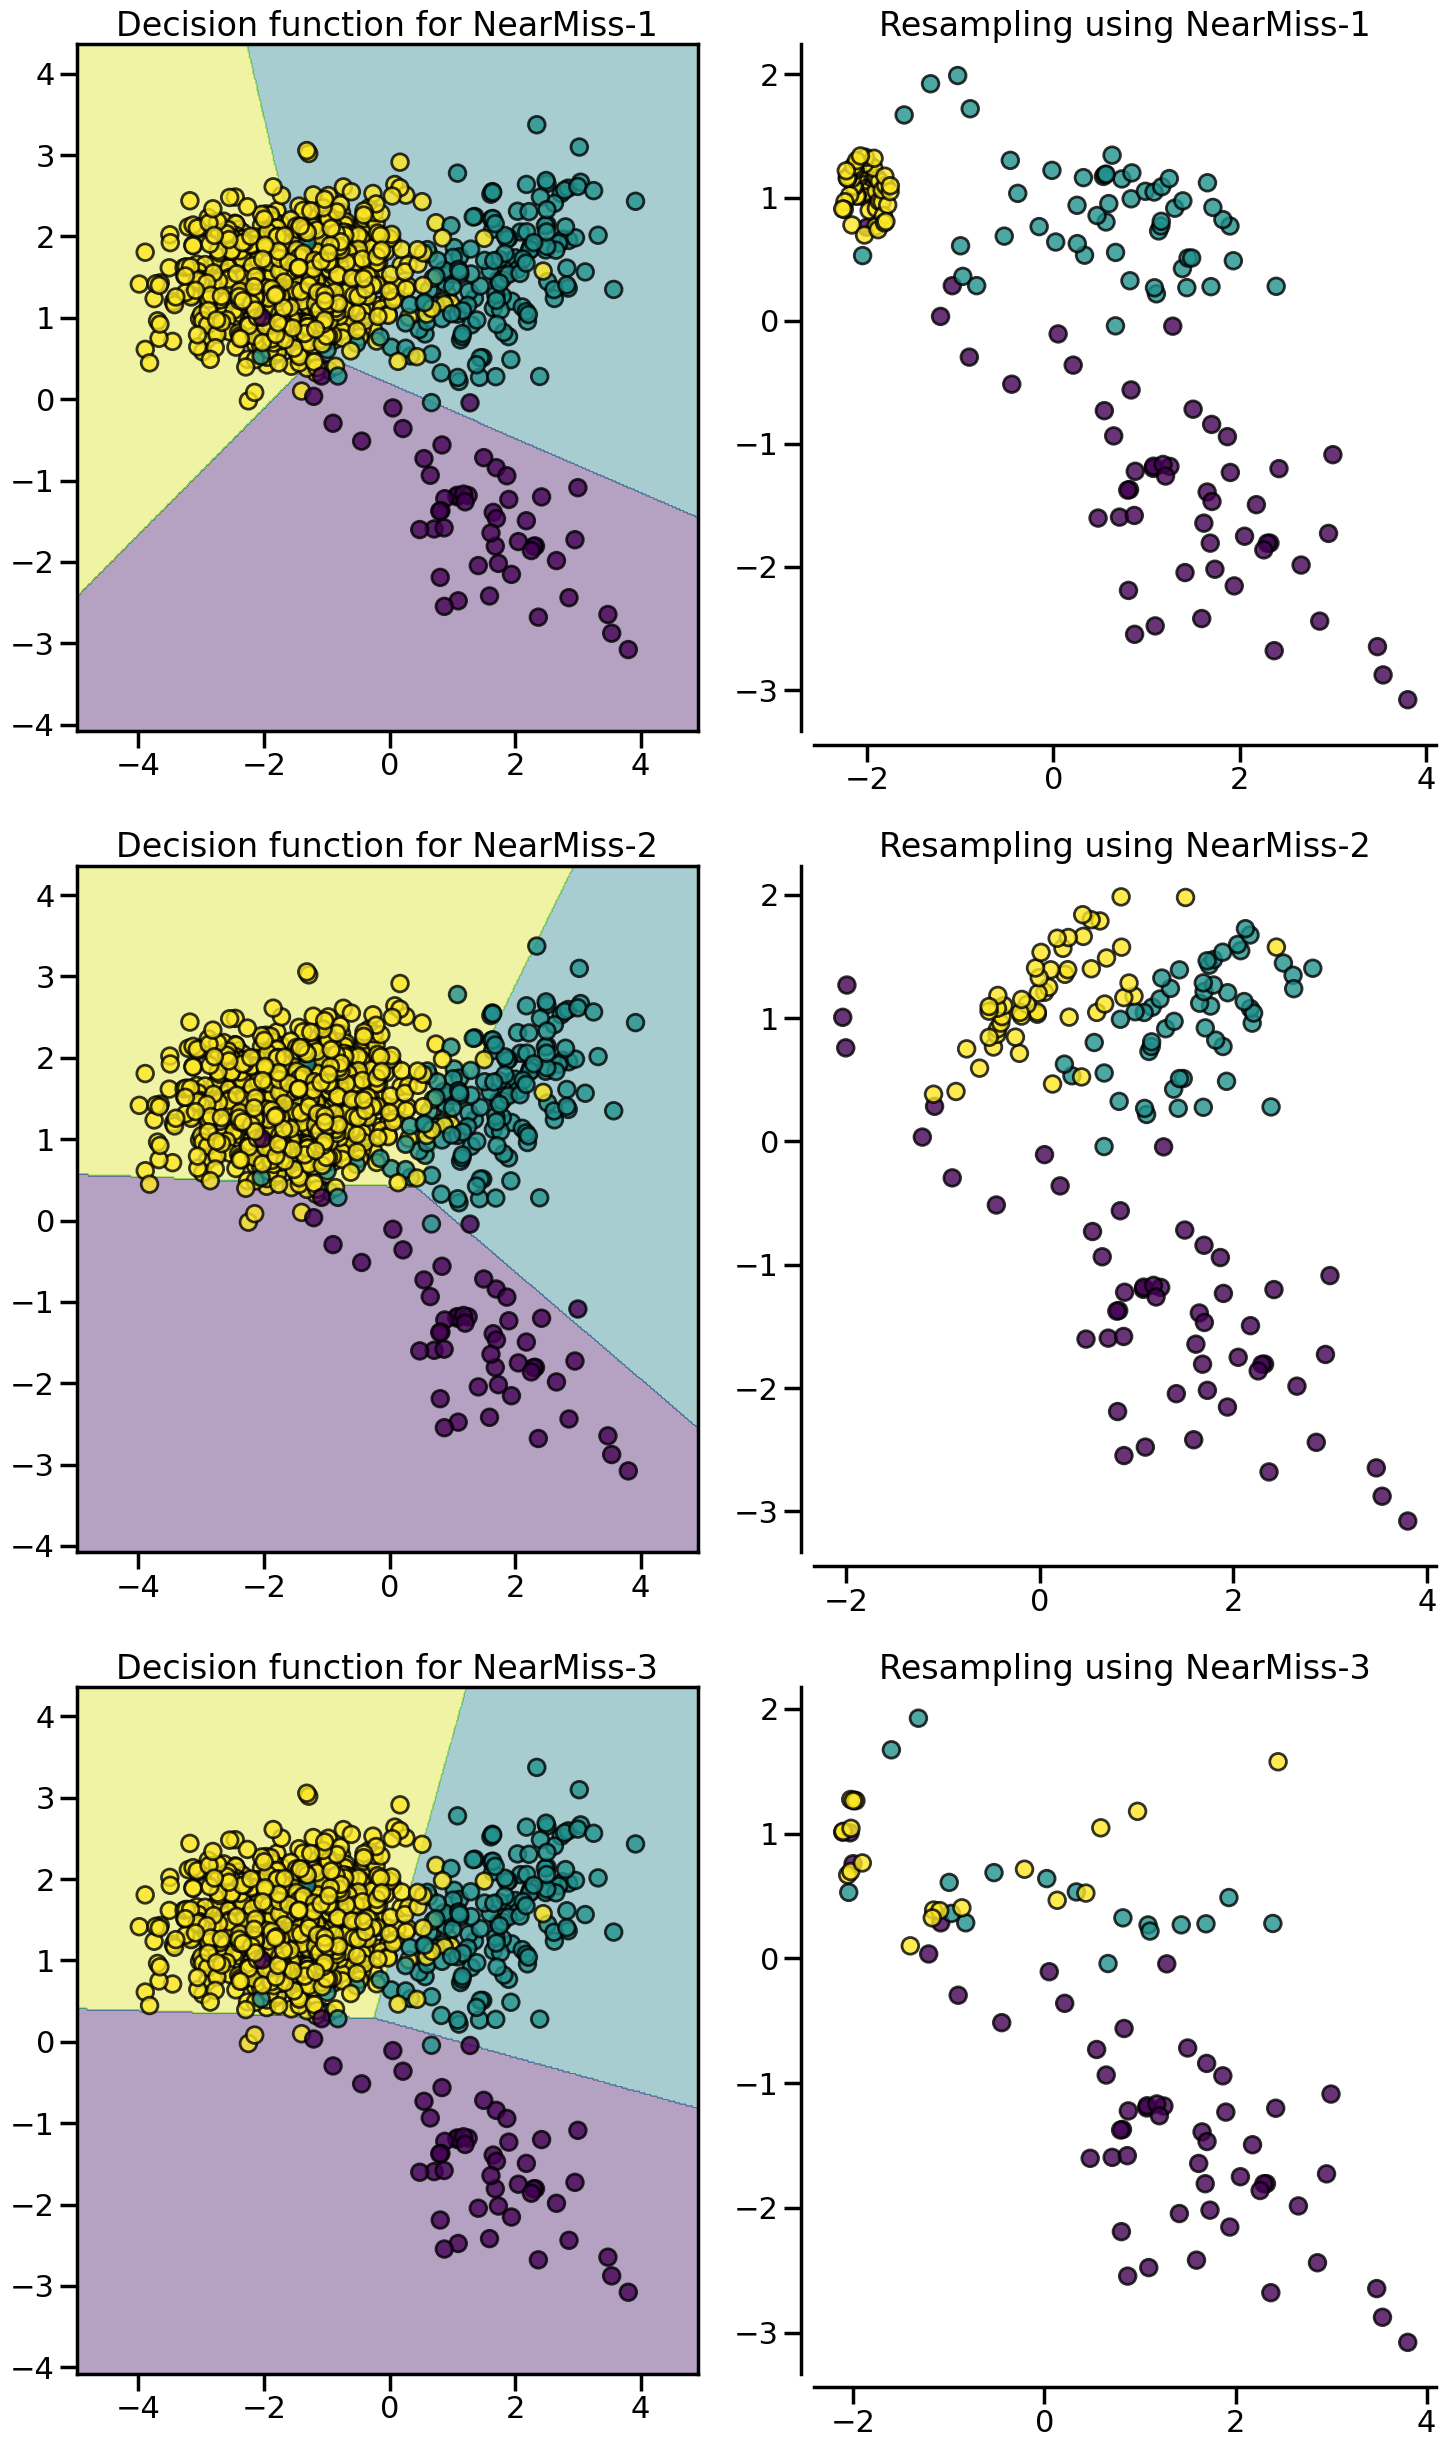

In [59]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 25))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X,
        y,
        model,
        ax[0],
        title=f"Decision function for {sampler.__class__.__name__}-{sampler.version}",
    )
    plot_resampling(
        X,
        y,
        sampler,
        ax[1],
        title=f"Resampling using {sampler.__class__.__name__}-{sampler.version}",
    )
fig.tight_layout()

# EditedNearestNeighbours

**EditedNearestNeighbours** removes samples of the majority class for which their class differ from the one of their nearest-neighbors. <br>

This sieve can be repeated which is the principle of the RepeatedEditedNearestNeighbours. <br>

**AllKNN** is slightly different from the RepeatedEditedNearestNeighbours by changing thevparameter of the internal nearest neighors algorithm, increasing it at each iteration.



In [39]:
from imblearn.under_sampling import (
    AllKNN,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
)

X, y = create_dataset(n_samples=500, weights=(0.2, 0.3, 0.5), class_sep=0.8)

samplers = [
    EditedNearestNeighbours(),
    RepeatedEditedNearestNeighbours(),
    AllKNN(allow_minority=True),
]



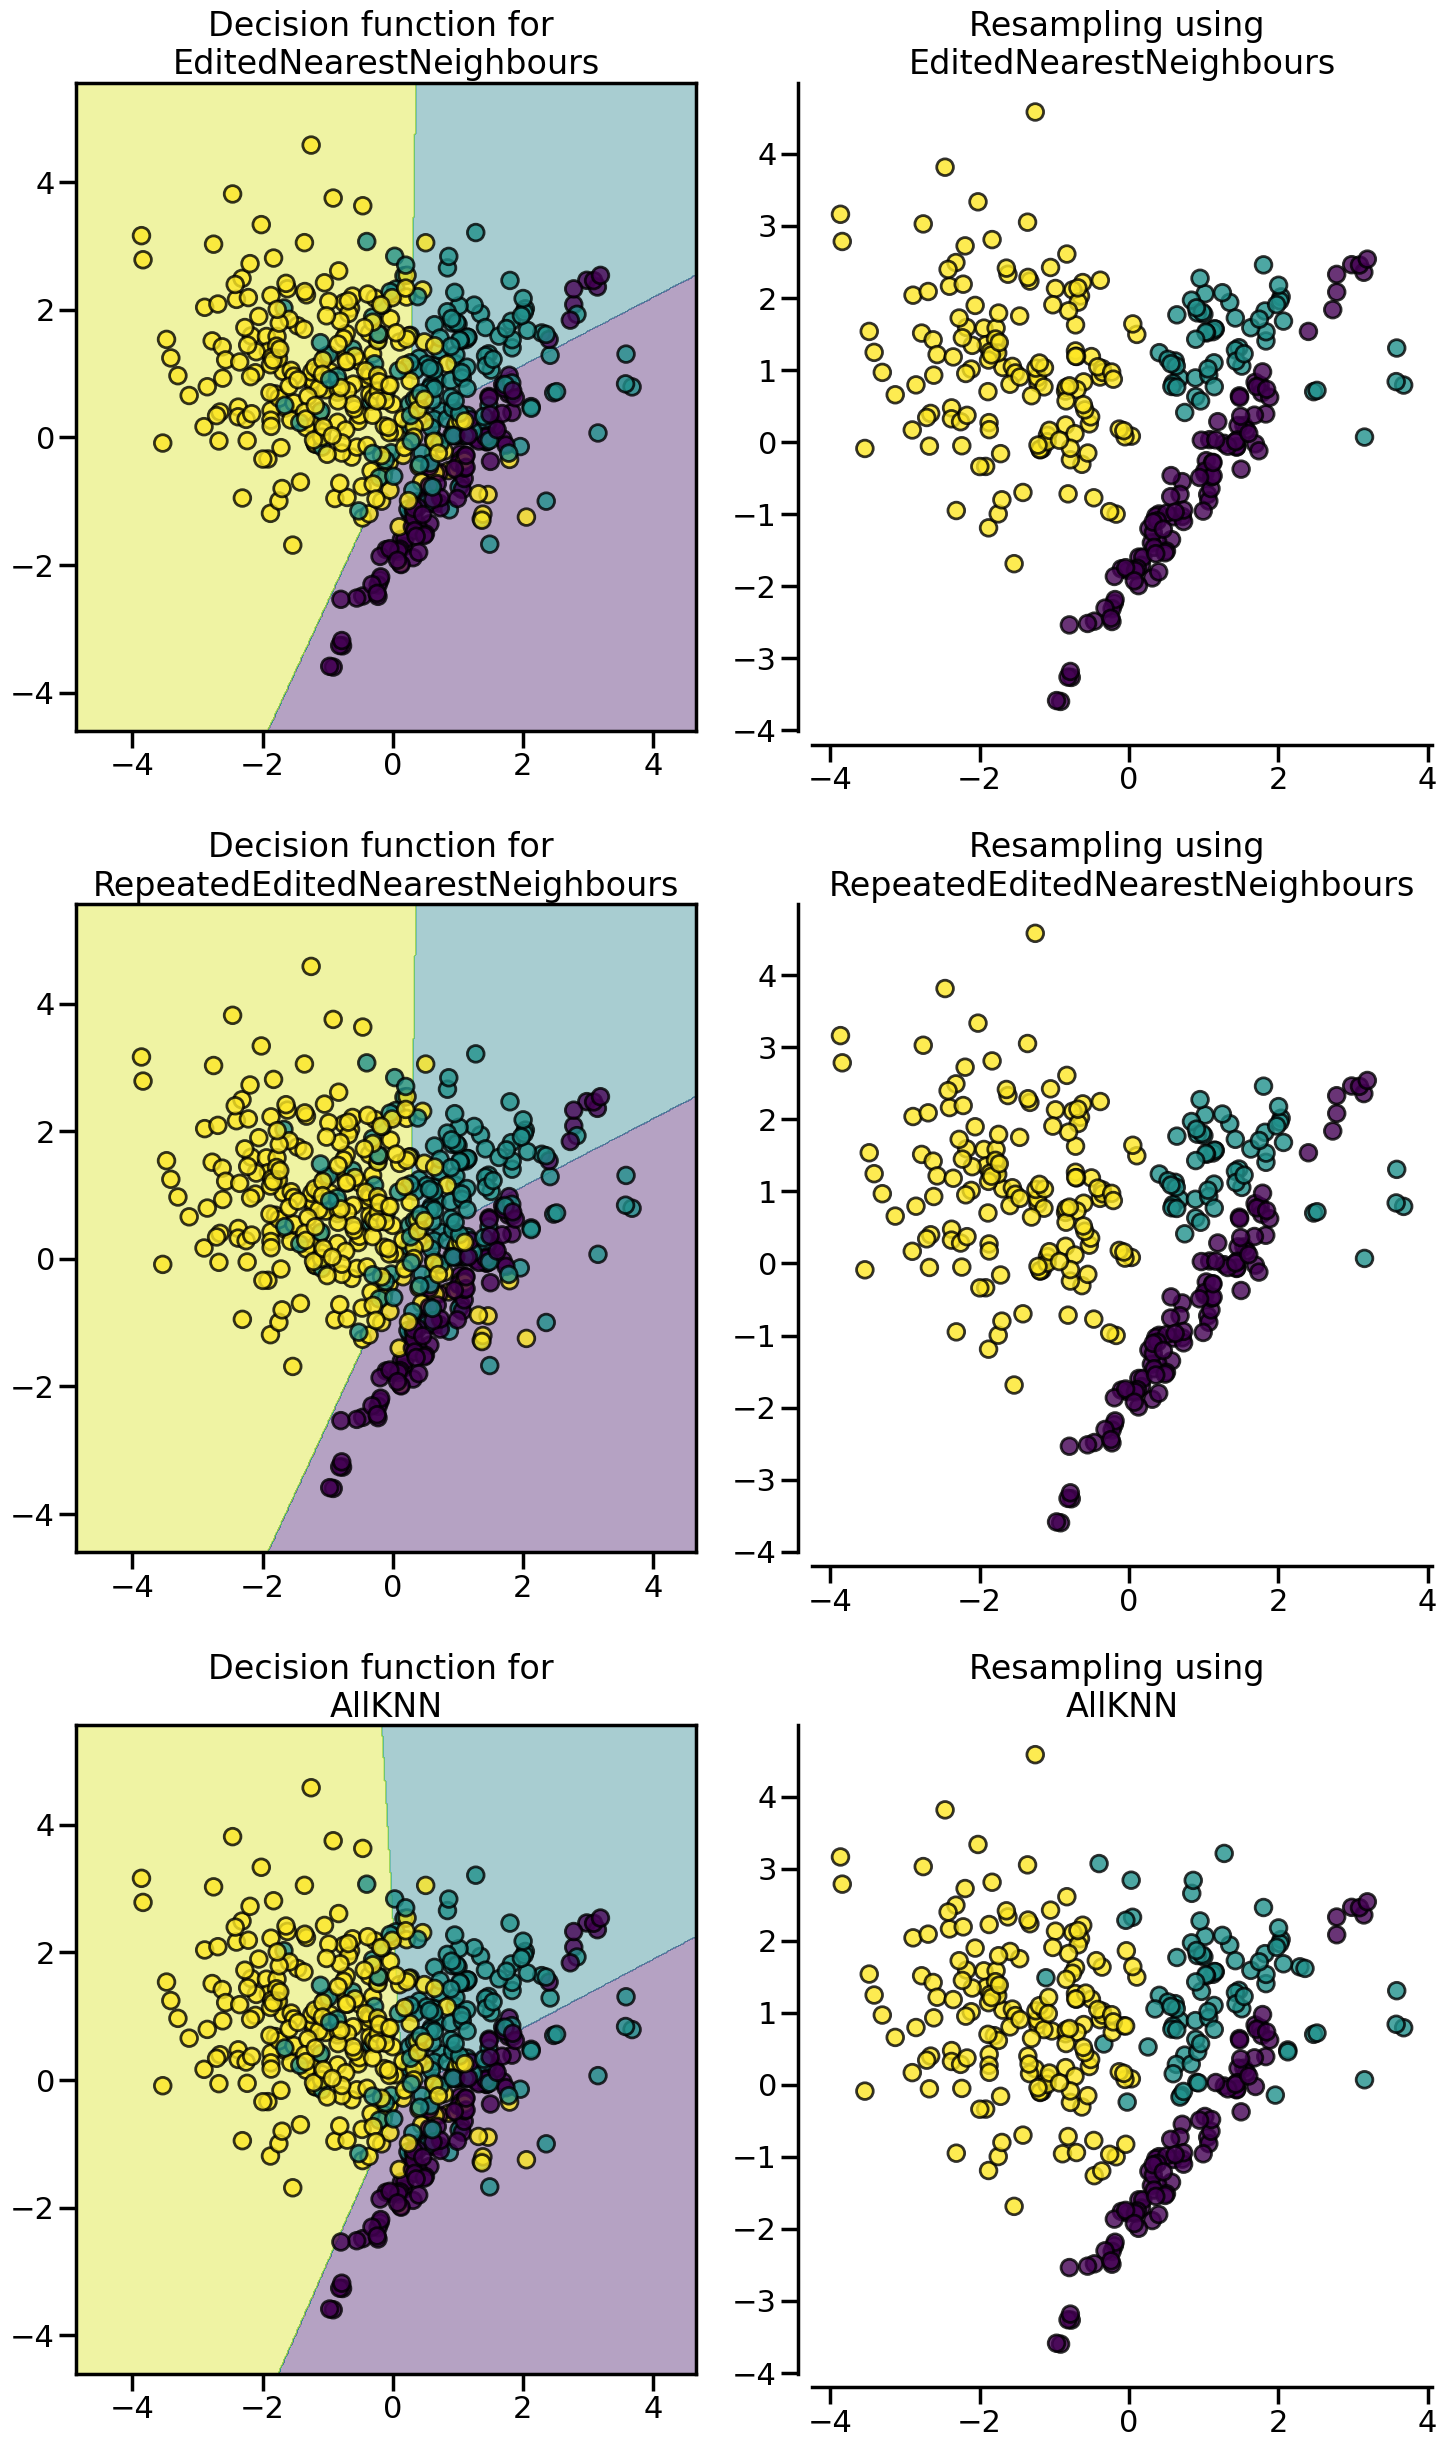

In [40]:
fig, axs = plt.subplots(3, 2, figsize=(15, 25))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, clf, ax[0], title=f"Decision function for \n{sampler.__class__.__name__}"
    )
    plot_resampling(
        X, y, sampler, ax[1], title=f"Resampling using \n{sampler.__class__.__name__}"
    )

fig.tight_layout()

# CondensedNearestNeighbour

CondensedNearestNeighbour makes use of a 1-NN to iteratively decide if a sample should be kept in a dataset or not. <br>

The issue is that CondensedNearestNeighbour is sensitive to noise by preserving the noisy samples. <br>

OneSidedSelection also used the 1-NN and use TomekLinks to remove the samples considered noisy. <br>

The NeighbourhoodCleaningRule uses an EditedNearestNeighbours to remove some samples. <br>

Additionally, they use a 3 nearest-neighbors to remove samples which do not agree with this rule.

In [45]:
from imblearn.under_sampling import (
    CondensedNearestNeighbour,
    NeighbourhoodCleaningRule,
    OneSidedSelection,
)

X, y = create_dataset(n_samples=500, weights=(0.2, 0.3, 0.5), class_sep=0.8)

samplers = [
    CondensedNearestNeighbour(random_state=0),
    OneSidedSelection(random_state=0),
    NeighbourhoodCleaningRule(),
]


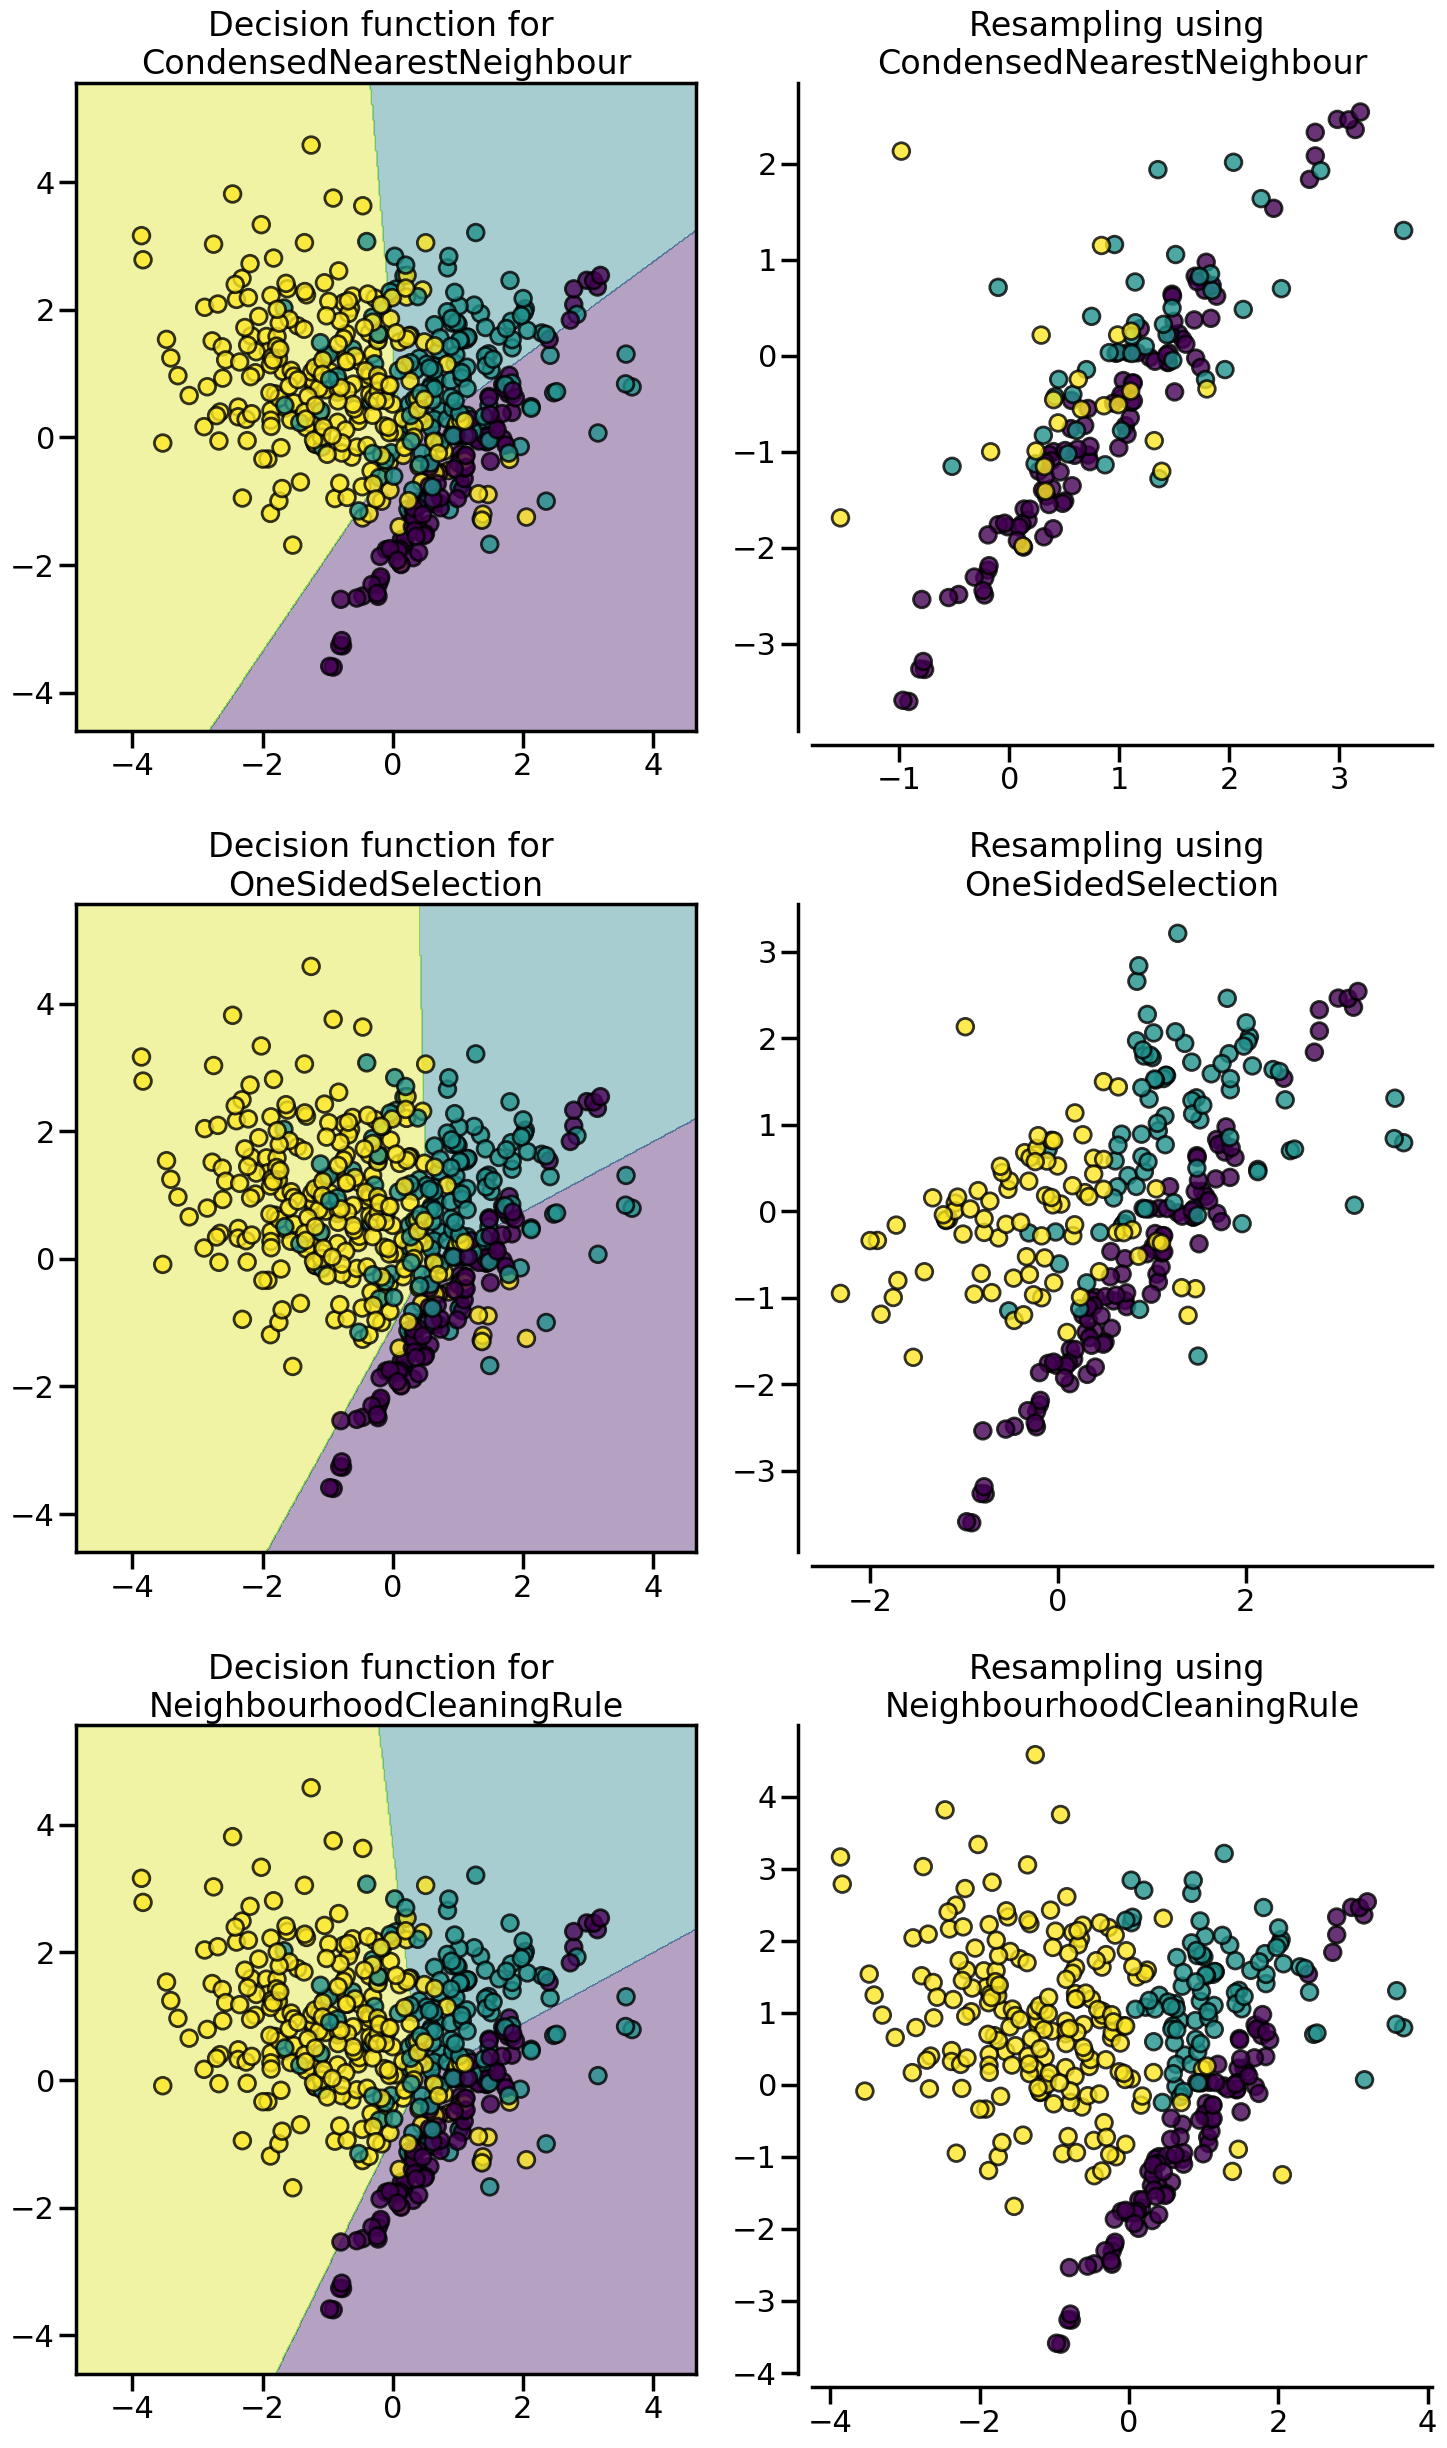

In [46]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 25))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, clf, ax[0], title=f"Decision function for \n{sampler.__class__.__name__}"
    )
    plot_resampling(
        X, y, sampler, ax[1], title=f"Resampling using \n{sampler.__class__.__name__}"
    )
fig.tight_layout()

# InstanceHardnessThreshold

InstanceHardnessThreshold uses the prediction of classifier to exclude samples.<br>

All samples which are classified with a low probability will be removed.



In [47]:
from imblearn.under_sampling import InstanceHardnessThreshold

samplers = {
    FunctionSampler(),  # identity resampler
    InstanceHardnessThreshold(
        estimator=LogisticRegression(),
        random_state=0,
    ),
}



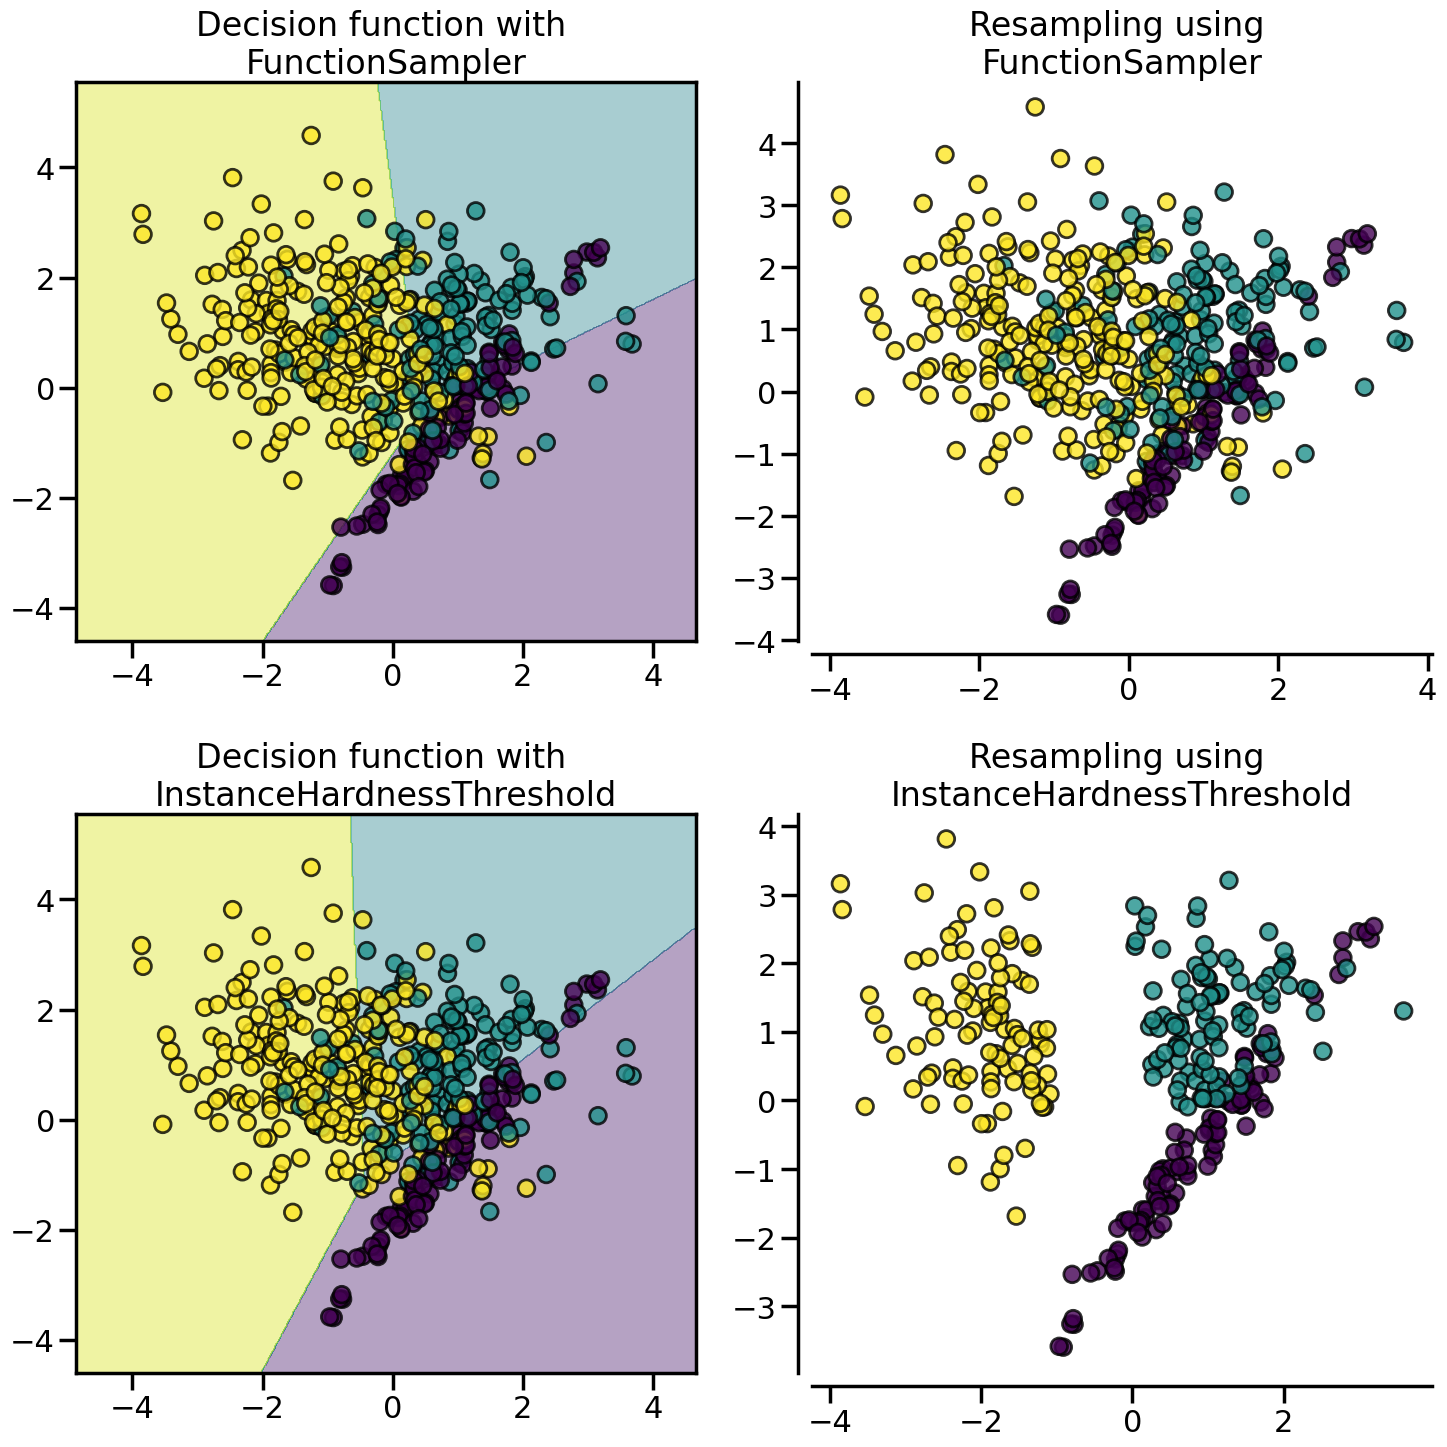

In [48]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X,
        y,
        model,
        ax[0],
        title=f"Decision function with \n{sampler.__class__.__name__}",
    )
    plot_resampling(
        X, y, sampler, ax[1], title=f"Resampling using \n{sampler.__class__.__name__}"
    )

fig.tight_layout()
plt.show()